## NLP y Visualizaciones @FOVISSSTEmx

### 1. Objetivos:
    - Aprender qué visualizaciones podemos realizar de nuestros procesamientos de lenguaje natural
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../Prototype/tweets_Fovissste.csv')

df.head()

,texts_Fovissste
0,fovissste emprendedor reune a las micro y pequ...
1,educacionfinanciera 💰 \n\neste ano ha sido de ...
2,"""construyes tu casa"" es la opcion del fovissst..."
3,en la conferencia matutina el secretario meyer...
4,en conferencia de prensa en palacio nacional e...


In [4]:
es_stop_words = ['de', 'el', 'que', 'la', 'en', 'los', 'para', 'del', 'con', 'a', 'y', 'no', 'por', 'se', 'es', 'una', 'un',
                'me', 'mi', 'las', 'al', 'si', 'mas', 'tu', 'como', 'ya', 'lo', 'su', 'te', 'esta', 'o', 'donde', 'cuando',
                'tengo', 'pero', 'ha', 'sin', 'son', 'les', 'yo', 'tus', 'todos', 'nos', 'sobre', 'este', 'esto', 'hola',
                'sus', 'han', 'estan', 'cual']
es_stop_words

['de',
 'el',
 'que',
 'la',
 'en',
 'los',
 'para',
 'del',
 'con',
 'a',
 'y',
 'no',
 'por',
 'se',
 'es',
 'una',
 'un',
 'me',
 'mi',
 'las',
 'al',
 'si',
 'mas',
 'tu',
 'como',
 'ya',
 'lo',
 'su',
 'te',
 'esta',
 'o',
 'donde',
 'cuando',
 'tengo',
 'pero',
 'ha',
 'sin',
 'son',
 'les',
 'yo',
 'tus',
 'todos',
 'nos',
 'sobre',
 'este',
 'esto',
 'hola',
 'sus',
 'han',
 'estan',
 'cual']

In [5]:
grouped_by_title = df.groupby('texts_Fovissste')['texts_Fovissste'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

all_words_except_stop_words = [word for word in all_words if word not in es_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

In [6]:
freq_dist

FreqDist({'fovissstemx': 386, 'credito': 80, 'vivienda': 60, 'infonavit': 56, 'fovissste': 52, 'sedatumx': 50, 'creditos': 49, 'gracias': 41, 'arqagustin': 40, 'casa': 37, ...})

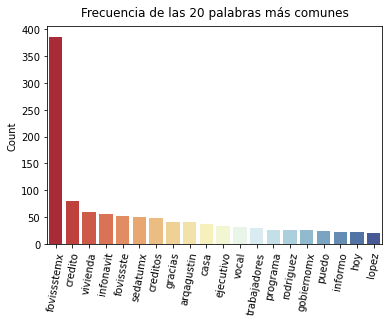

In [7]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0],y=most_common_20[:, 1].astype('int'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

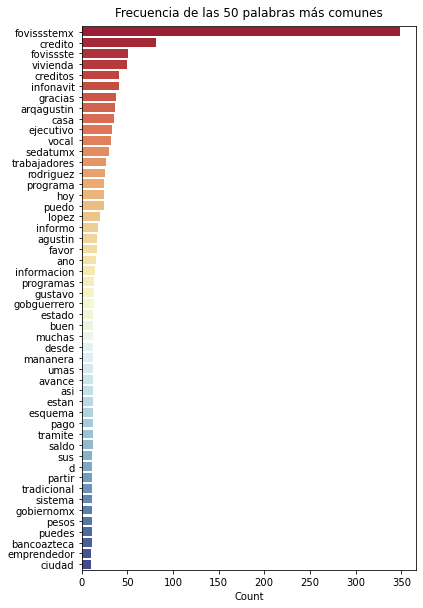

In [15]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_50[:, 1].astype('int'), y=most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [8]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('vocal', 'ejecutivo'): 28, ('ejecutivo', 'fovissstemx'): 24, ('infonavit', 'fovissstemx'): 23, ('fovissstemx', 'arqagustin'): 21, ('rodriguez', 'lopez'): 19, ('sedatumx', 'infonavit'): 15, ('gustavo', 'rodriguez'): 15, ('fovissstemx', 'infonavit'): 15, ('gracias', 'fovissstemx'): 15, ('programas', 'vivienda'): 14, ...})

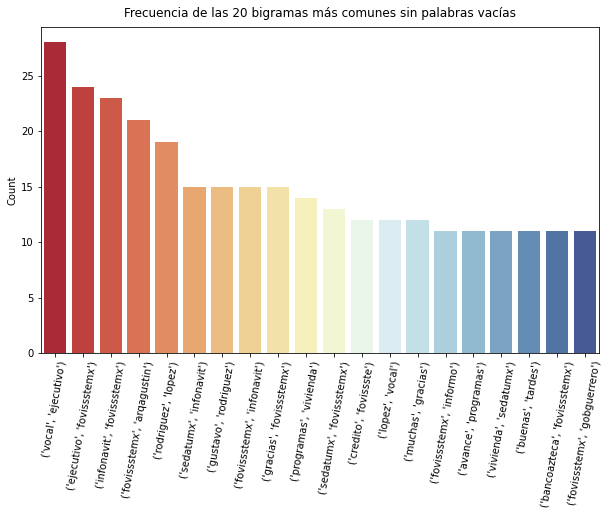

In [9]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [10]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

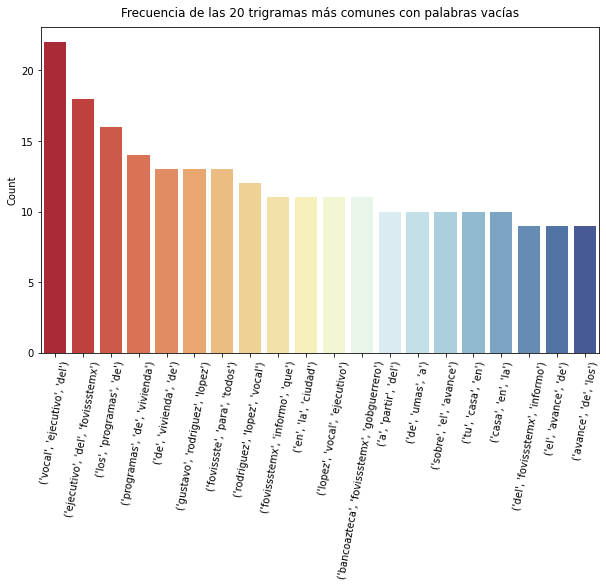

In [11]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

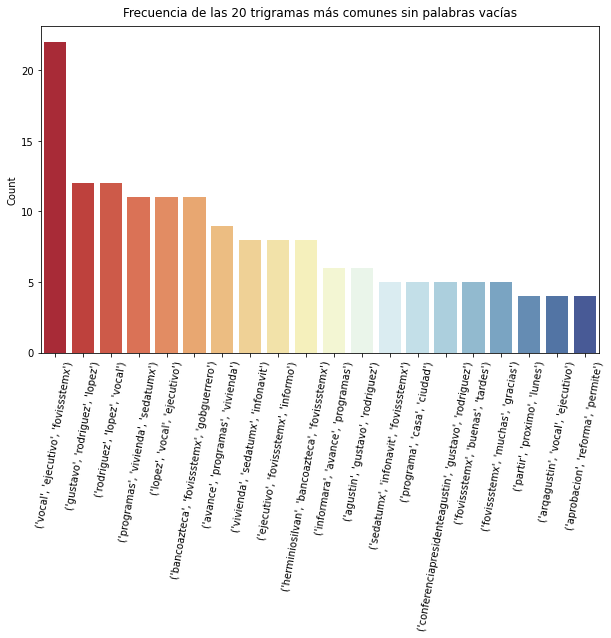

In [18]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [12]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

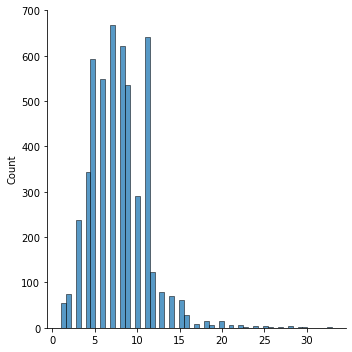

In [13]:
sns.displot(word_lengths, kde=False);

In [14]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

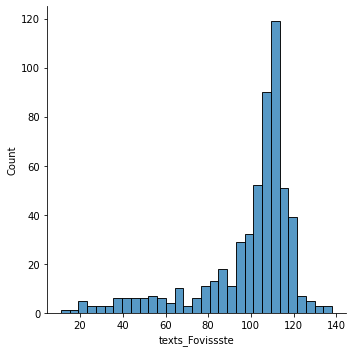

In [15]:
sns.displot(sentence_lengths, kde=False);

In [16]:
num_of_words = grouped_by_title.str.split(' ').str.len()

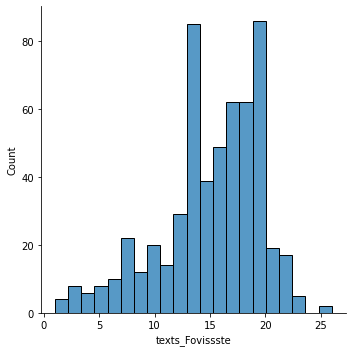

In [17]:
sns.displot(num_of_words, kde=False);

Para terminar, vamos a hacer una nube de palabras utilizando la librería `wordcloud`.

In [18]:
from wordcloud import WordCloud

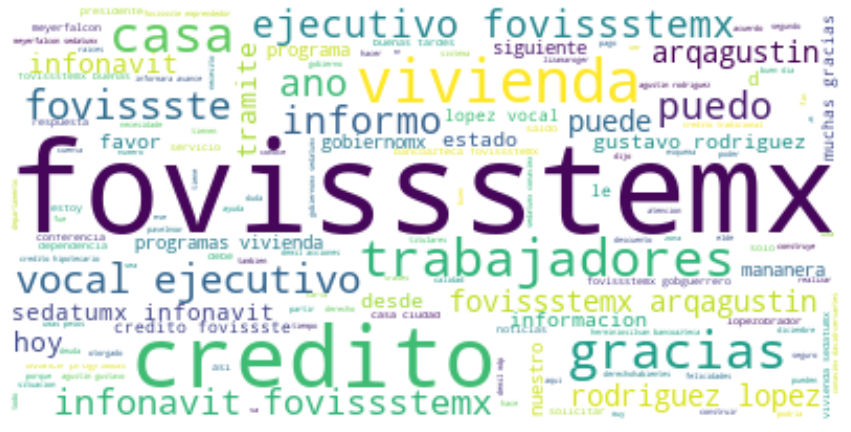

In [19]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()